## Louisville Metro Animal Services: Cats and Dogs
### Introduction/Overview
   Household pets, such as cats and dogs, are dear to many a human heart, but sometimes beloved pets end up in a different situation. How do they often fare? In this project, I set out to examine a dataset put together over several years by the Louisville Metro Animal Services. Both wildlife and household pets go through animal services, but in this report the reasons for intake and outcomes are examined for two common pets: cats and dogs. By analyzing the data, it becomes evident that cats and dogs are indeed not the same, and unsurprisingly have very different outcomes when they find themselves in the animal shelter.
   
   To examine the outcomes of cats and dogs brought to animal services, I gathered a dataset from Louisville, KY's Open Data database website (https://data.louisvilleky.gov). Python, Jupyter Notebook, and Matplotlib were used to create the resulting graphs to aid in the analyzation of data. Initially I used SQL to make queries of interest to me, such as looking at how many black cats were taken in, and what other kinds of animals are brought in. There is a very large amount of data in this set, so cats and dogs were settled upon. 
   
   The question to answer with this analysis: **how do the intake reasons and outcomes differ for cats and dogs at Louisville Metro Animal Services?** The animal's health status at intake, resulting outcome, and reasons for intake were chosen to visualize in this report. These were chosen to illustrate just how many beloved pets are brought in for a variety of reasons, and to highlight the importance of spaying/neutering pets and also the importance of taking pet ownership seriously. 

### Glossary

**Intake Asilomar Status**: The following is stated of The Asilomar Accords, an widely known agreement between animal welfare agents:

*In August of 2004, a group of animal welfare industry leaders from across the nation convened at Asilomar in Pacific Grove, California, for the purpose of building bridges across varying philosophies, developing relationships and creating goals focused on significantly reducing the euthanasia of healthy and treatable companion animals in the United States.*

This document outlines agreed-upon terms to define an animal's condition upon intake: 

***Healthy*** - Animal is healthy and pose no safety or health risk.

***Treatable + Rehabilitable*** - Animal is not healthy but can become so with proper treatment.

***Treatable + Manageable*** - Animal is not healthy and have a permanant condition that, with consistent treatment, does not impact the animal's quality of life.

***Unhealthy + Untreatable*** - Animal has behavioral issues that are unmanageable for pet owners, or has a disease or injury that negatively impacts the animal's quality of life.

**Intake Reason**: The main reason for which the animal is brought in to Metro Animal Services.

**TNR**: Stands for Trap, Neuter(Spay), Return. This refers to the practice of trapping stray animals, to neuter/spay them and then return them to their previous environment. This helps cut down the stray population and gives the animal a chance out in the wild.

**RTO**: Stands for Return to Owner. This refers to an outcome type in which the animal is returned to the owner of the animal. For example, an owner can bring the animal in for veterinary services or the animal was turned in at at Animal Services because it was found away from home.

## Install matplotlib and initialize database

In [1]:
# Install matplotlib
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline

    100% |████████████████████████████████| 1.4MB 13.5MB/s ta 0:00:01
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sizing of charts
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 90

# Create sqlite database
conn = sqlite3.connect('animal_services.db')
# Read CSV into a variable
animalservices_data = pd.read_csv('louisville_animal_services_data.csv')
# Use as SQL
animalservices_data.to_sql('animalservices_data', conn, if_exists='replace')

## Outcomes
There are many different outcomes a cat or dog can have, so 7 of the most common were examined: euthanization, death, adoption, missing, foster, RTO, and release.


In [3]:
# Cat outcomes
catOutcomes = pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeType as 'Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT'
    AND (OutcomeType = "EUTH"
    OR OutcomeType = "DIED"
    OR OutcomeType = "ADOPTION"
    OR OutcomeType = "MISSING"
    OR OutcomeType = "FOSTER"
    OR OutcomeType = "RTO"
    OR OutcomeType = "RELEASED")
    GROUP BY OutcomeType
    ORDER BY Count DESC
    ;
""", conn)

In [4]:
# Dog outcomes
dogOutcomes = pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeType as 'Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG'
    AND (OutcomeType = "EUTH"
    OR OutcomeType = "DIED"
    OR OutcomeType = "ADOPTION"
    OR OutcomeType = "MISSING"
    OR OutcomeType = "FOSTER"
    OR OutcomeType = "RTO"
    OR OutcomeType = "RELEASED")
    GROUP BY OutcomeType
    ORDER BY Count DESC
    ;
""", conn)

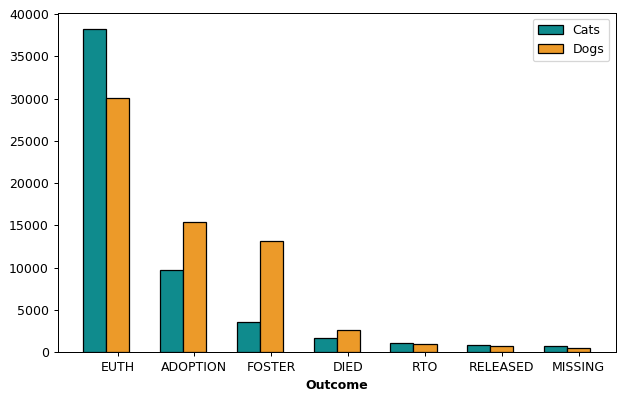

In [5]:
# Bar chart for outcome
barWidth = 0.30
bars1 = catOutcomes["Count"]
bars2 = dogOutcomes["Count"]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#0F8B8D', width=barWidth, edgecolor='black', label='Cats')
plt.bar(r2, bars2, color='#EC9A29', width=barWidth, edgecolor='black', label='Dogs')
plt.xlabel('Outcome', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], catOutcomes["Outcome"])

plt.legend()
plt.show()

   This chart illustrates some vast differences between the outcomes of the two animals. Euthanasia is by far the most common outcome, and is more common for cats. Adoption and fostering is far more common for dogs than for cats. More dogs are reported as having died as an outcome than cats... perhaps more dogs come in due to owner's inability to treat illness, or perhaps stray dogs are less likely to come in healthy. Somewhat surprisingly, very few pets are returned to owner... suggesting that Animal Services does not often receive lost pets. It is interesting to see results for release on dogs, since only cats had entries for TNR (trap, neuter, release).

## Status at Outcome
The Asilomar Status column will be used to make comparisons of the health status at outcome for cats and dogs once they have been taken in to Animal Services.

In [6]:
#Outcome Asilomar Status for cats
outcomeCats = pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeAsilomarStatus as 'Status', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT' AND OutcomeAsilomarStatus != 'None'
    GROUP BY OutcomeAsilomarStatus
    ORDER BY Count DESC
    ;
""", conn)
outcomeCats

,Status,Count
0,HEALTHY,65970
1,UNHEALTHY/UNTREATABLE,2692
2,TREATABLE/MANAGEABLE,18


In [7]:
#Outcome Asilomar Status for dogs
outcomeDogs = pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeAsilomarStatus as 'Status', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG' AND OutcomeAsilomarStatus != 'None'
    GROUP BY OutcomeAsilomarStatus
    ORDER BY Count DESC
    ;
""", conn)
outcomeDogs

,Status,Count
0,HEALTHY,76585
1,TREATABLE/MANAGEABLE,369
2,UNHEALTHY/UNTREATABLE,54


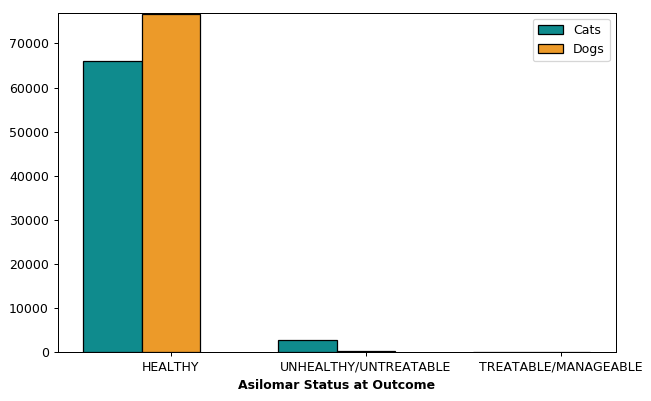

In [8]:
barWidth = 0.30
bars1 = outcomeCats["Count"]
bars2 = outcomeDogs["Count"]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#0F8B8D', width=barWidth, edgecolor='black', label='Cats')
plt.bar(r2, bars2, color='#EC9A29', width=barWidth, edgecolor='black', label='Dogs')
plt.xlabel('Asilomar Status at Outcome', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], outcomeCats["Status"])
axes = plt.gca()
axes.set_ylim(0, 77000)
plt.legend()
plt.show()

Treatable/Manageable status is nearly non-existent for both cats and dogs, so it can be inferred that it is uncommon for a pet to leave Animal Services with a condition to recieve consistent medical attention. The vast majority of pets have a healthy outcome, especially dogs. Cats have a higher rate of being impossible for Animal Services to treat. If we look back at the former graph of outcomes, it is despairing to see how many dogs and cats are healthy, but still euthanized... likely due to shelter overcrowding.

## Intake reasons
The dataset includes information about noted intake reasons for animals brought in to Animal Services. It should be noted that the majority of records do not have an entry for this field: 77 percent of all entries gathered for both cats and dogs did not include a reason for intake.

In [9]:
# Query the Top 10 IntakeReasons per Cat
# This does not include the many rows that are 'None'
catIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)


In [10]:
# Query the Top 10 IntakeReasons per Dog
# This does not include the many rows that are 'None'
dogIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)
df = pd.read_sql_query("""
    SELECT 
    IntakeReason
    FROM animalservices_data
    WHERE AnimalType = 'DOG' OR AnimalType = 'CAT'
    ;
""", conn).fillna('None')


In [11]:
# Get total number of entries, total entires without a reason, then get percentage of 
# entries that DO NOT have a reason listed.
totalEntries = df['IntakeReason'].count()
totalNoneEntries = df.loc[df['IntakeReason'] == 'None'].count()
(totalNoneEntries / totalEntries) * 100

IntakeReason    76.813402
dtype: float64

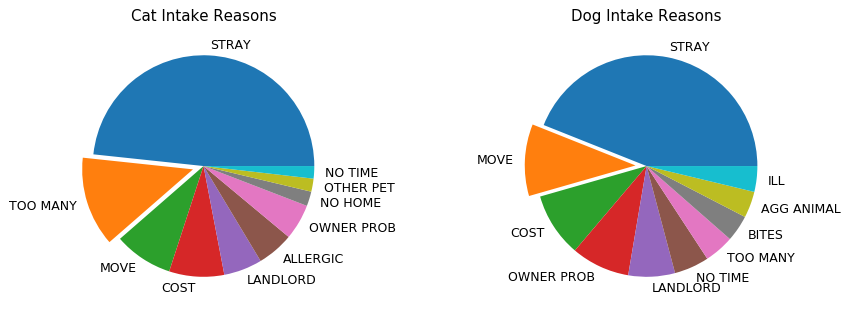

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 6))

# Pie chart for cat intake reasons
labels = catIntake["Intake Reason"]
catCount = catIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
ax1.pie(catCount, labels=labels, explode=explode)
ax1.set_title("Cat Intake Reasons")

# Pie chart for dog intake reasons
labels = dogIntake["Intake Reason"]
dogCount = dogIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
ax2.pie(dogCount, labels=labels, explode=explode)
ax2.set_title("Dog Intake Reasons")

plt.subplots_adjust(wspace=0.6, left=0.1)
plt.show()

Sampling the remaining entries that do include an intake reason, it is evident that the intake reasons for cats and dogs differ. Cats and dogs both overwhelmingly come in as strays, with cats coming in as strays slightly more frequently. When examining the top ten intake reasons, one can see that there are a variety of different reasons for each animal. For cats, the second most common reason for intake is that an owner surrendered or lost the animal due to having too many animals. For dogs, the second most common reason is "move," which illustrates that most owners surrender or lose their dogs due to the inability to make arrangements for their pet when moving to a new home. 

Both pets share the following reasons in the top ten: moving house, cost of ownership, landlord, no time for the pet, and having too many. Judging from the following pie charts, it appears more likely that cats would be surrendered due to allergies than dogs, and dogs were more likely to be surrendered due to aggression and behavioral problems.

### Conclusion

While circumstances happen out of our control as pet owners, we have seen that there is an alarming number of healthy cats and dogs euthanized at animal services. This is not suprising or unique for Louisville, however: ASPCA.org reports that 3.2 million cats and 3.3 million dogs enter shelters annually across the United States. There is a bright side, as the ASPCA's website also states that the number of cats and dogs euthanized has declined from 2.6 million in 2011 to 1.5 million. This is due to, as they explain, a rise in adoption and animals returned to their owners. Perhaps with more emphasis on spaying and neutering our pets, and promoting adoption, we will see that this trend will continue. 

#### References
Animal Service Intake and Outcome dataset: https://data.louisvilleky.gov/dataset/animal-service-intake-and-outcome

The Asilomar Accords: https://www.shelteranimalscount.org/docs/default-source/DataResources/2004aaccords5.pdf?sfvrsn=31c1ff76_0

ASPCA Pet Statistics: https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics